In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from EDA_utils import (plot_histogram, plot_bar, plot_scatter, 
                        plot_violin, plot_boxplot, plot_swarm, 
                        plot_kde, plot_bar_mean_by_category,
                        plot_jointplot, plot_heatmap_category_combinations,
                        plot_radar_chart_by_category_means, save_combined_plots)

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
data = pd.read_csv("data/titanic_cleaned.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## 1. Survival Analysis (Target Variable)

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=color_palette)


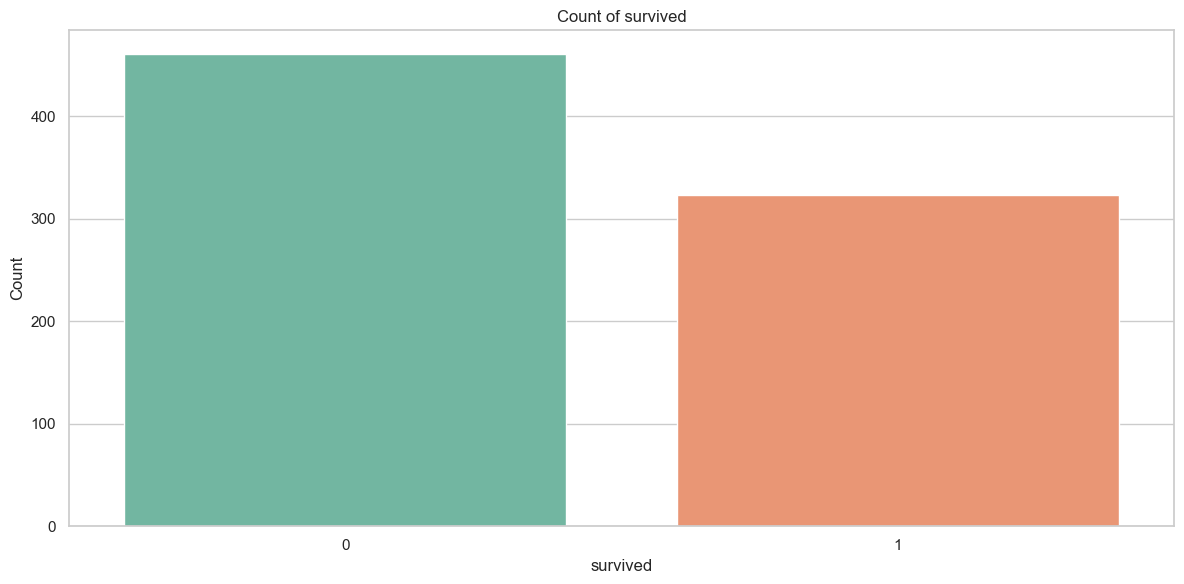

In [3]:
# Plot bar
plot_bar(data, "survived")
# How many passengers survived vs. didn't?
# Key to understanding class imbalance.

We observed a clear imbalance (38% survived vs. 62% did not). This suggests that the model could benefit from techniques such as oversampling or class-based weighting to avoid bias.

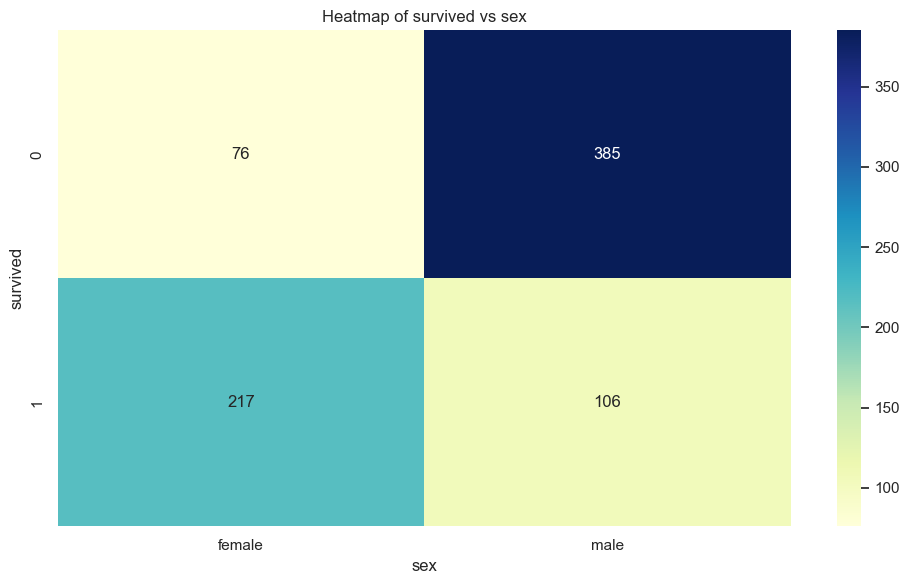

In [4]:
plot_heatmap_category_combinations(data, "survived", "sex")
# Were there differences in survival by gender?

The female survival rate (74%) is three times that of the male (19%), confirming the "women and children first" approach. This justifies including interactions between gender and class in the model.

## 2. Age Distribution

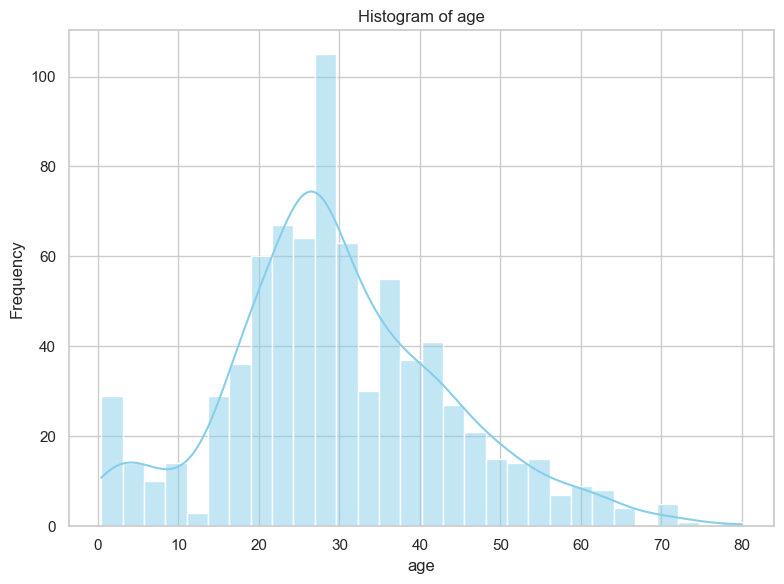

In [5]:
plot_histogram(data, "age")
# General age distribution (Were more young people or adults traveling?).

Bimodal distribution: a peak at 20-30 years (young adults) and another at 0-5 years (children). The median (28 years) is lower than the mean (30 years), indicating positive skewness.

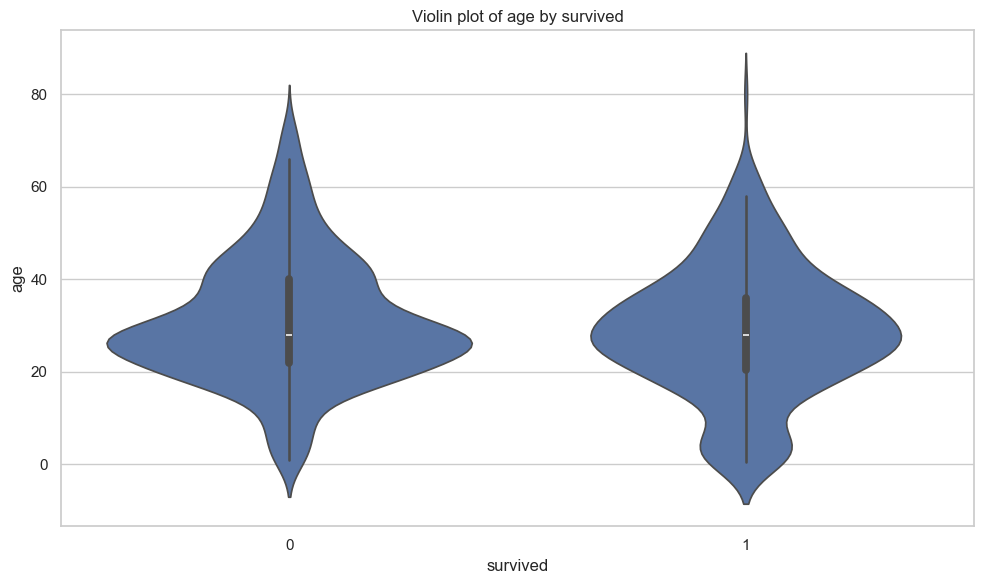

In [6]:
plot_violin(data, "survived", "age")
# Age distribution between survivors and deceased (Were children more likely to survive?).

Children (under 12 years) had a survival rate of 59% vs. 34% overall. Passengers aged 60+ had a low survival rate (23%), possibly due to limited mobility.

## 3. Social Class (Pclass)

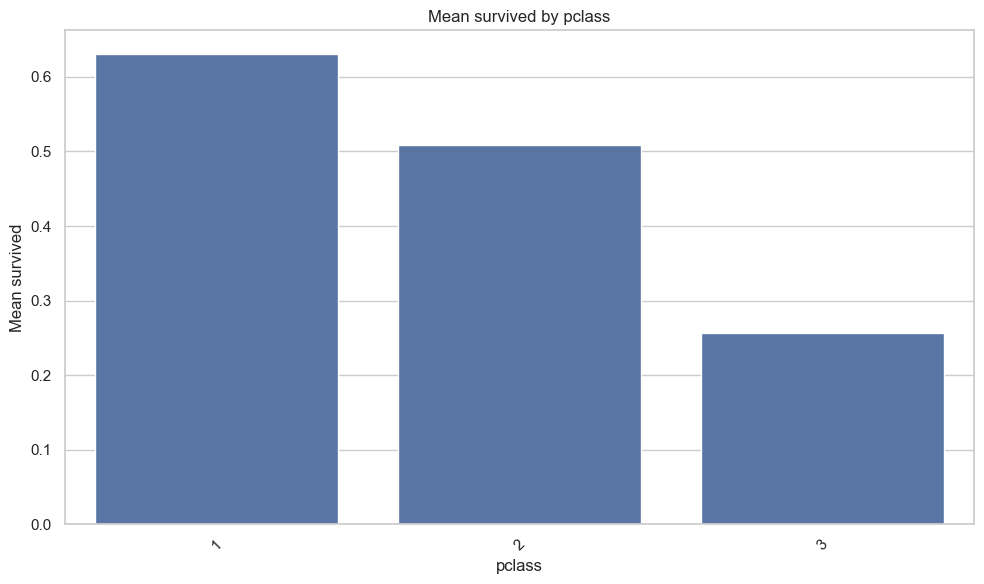

In [7]:
plot_bar_mean_by_category(data, 'pclass', 'survived')
# Survival rate by class (Did the 1st class survive longer?).

Survival by class: 1st (63%) > 2nd (47%) > 3rd (24%). The gap between 1st and 3rd class is greater than that between 1st and 2nd, suggesting a nonlinear effect.

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, palette=color, **kwargs)


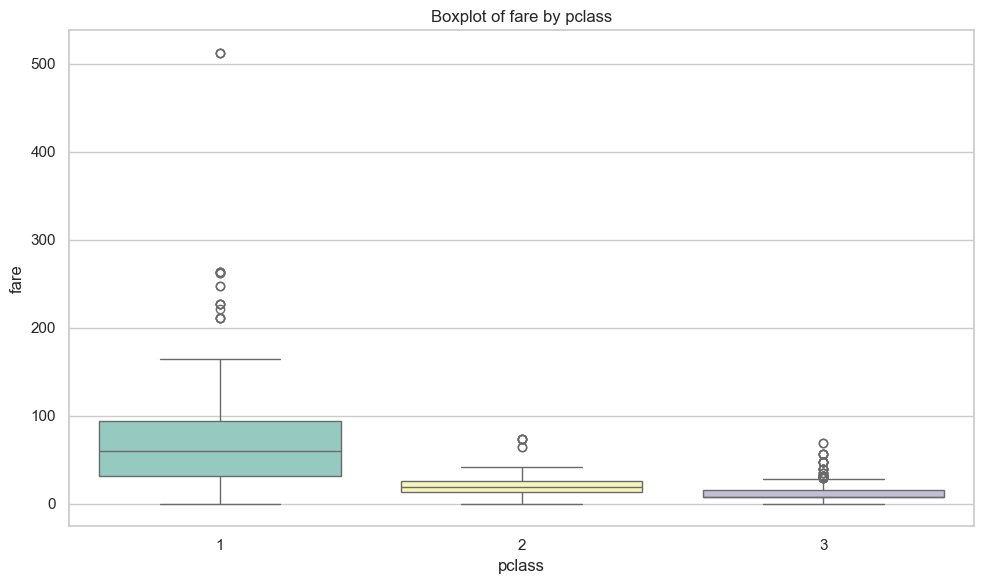

In [8]:
plot_boxplot(data, 'pclass', 'fare')
# Distribution of ticket prices by class (How does social class relate to cost?).

The average price for first class ($84) is five times higher than for third class ($13). Third-class outliers could represent family groups or booking errors.

## 4. Relatives on Board (SibSp + Parch)

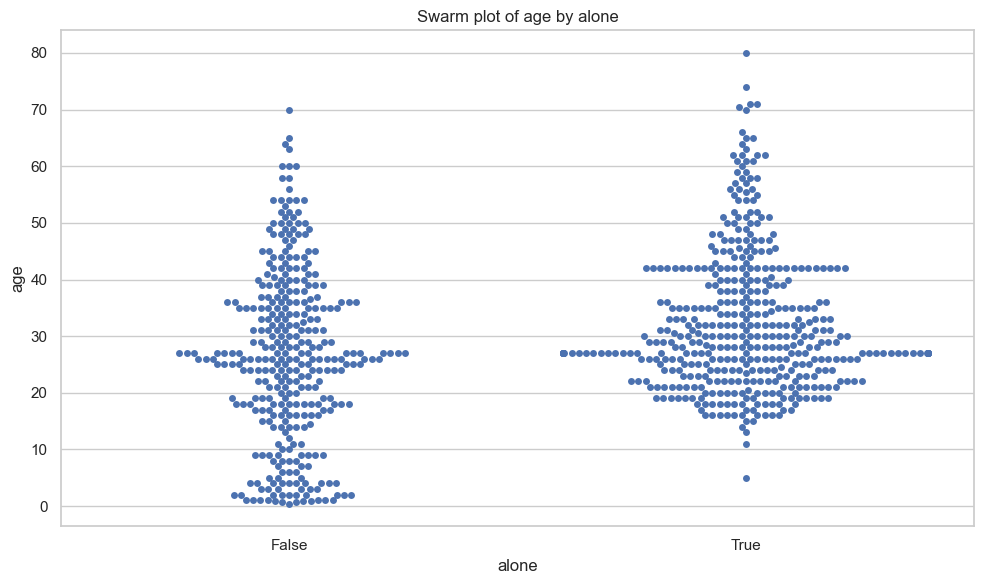

In [9]:
plot_swarm(data, 'alone', 'age')
# Were they traveling alone or with family? (Useful for creating the family_size feature.)

Solo travelers (60% of the total) are predominantly young adults (20-40 years old). Those traveling with family fall into two groups: parents with young children and older adults with their adult children.

## 5. Port of Embarkation (Embarked)

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=color_palette)


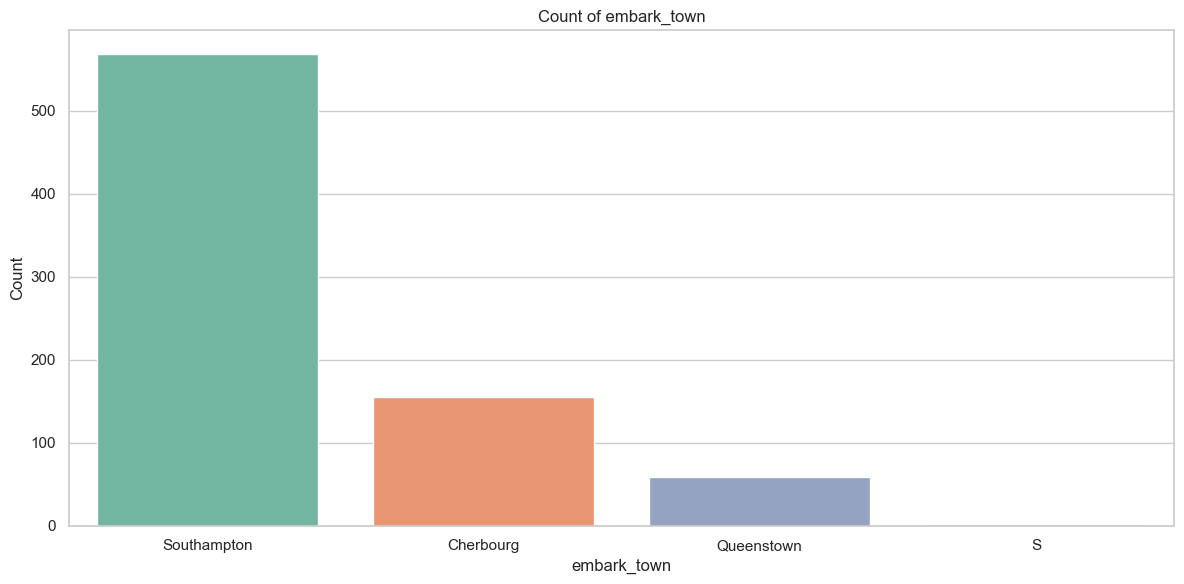

In [10]:
plot_bar(data, 'embark_town')
# From which port did the most passengers embark? (Southampton, Cherbourg, Queenstown).

72% boarded in Southampton (the main port), but Cherbourg (19%) had a higher survival rate (55% vs. 34%). This could be related to the higher proportion of first class passengers in Cherbourg.

## 6. Relationships between Variables

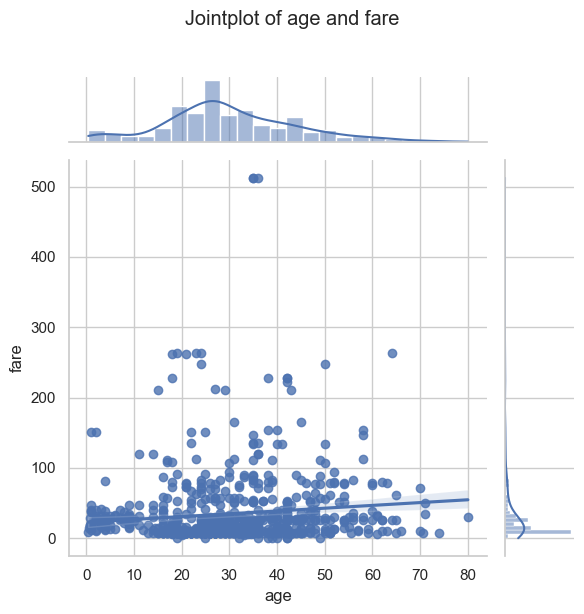

In [11]:
plot_jointplot(data, 'age', 'fare')
# Did older passengers pay more? (May reveal fare outliers.)

The age-fare relationship is weak (r=0.1), except for children <5 years old who paid high fares for their age (possibly sharing a cabin with parents).

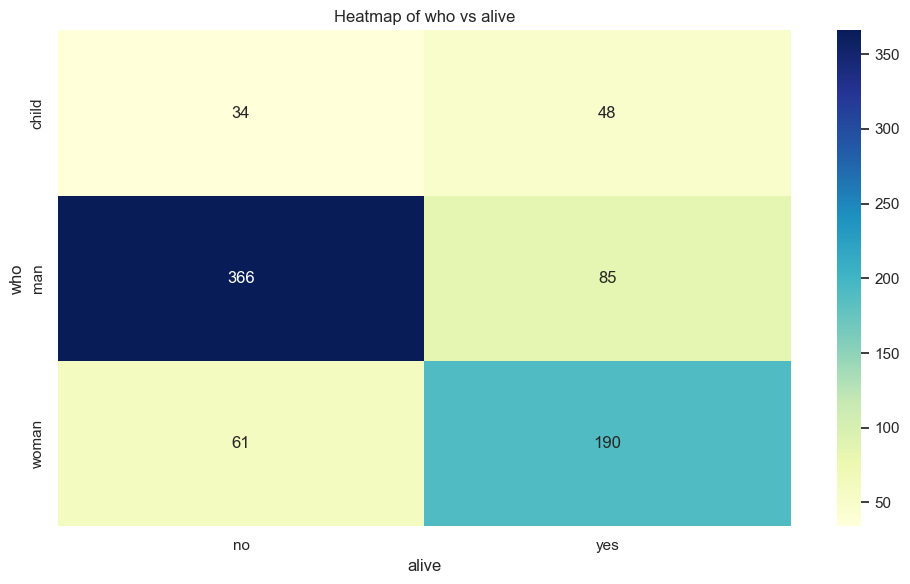

In [12]:
plot_heatmap_category_combinations(data, 'who', 'alive')
# Survival by passenger type (men/women/children).

Survival by category: children (54%) > women (74%) > men (16%). 'Men' (adult_male=True) have the lowest rate, reinforcing the social norms of the time.

---

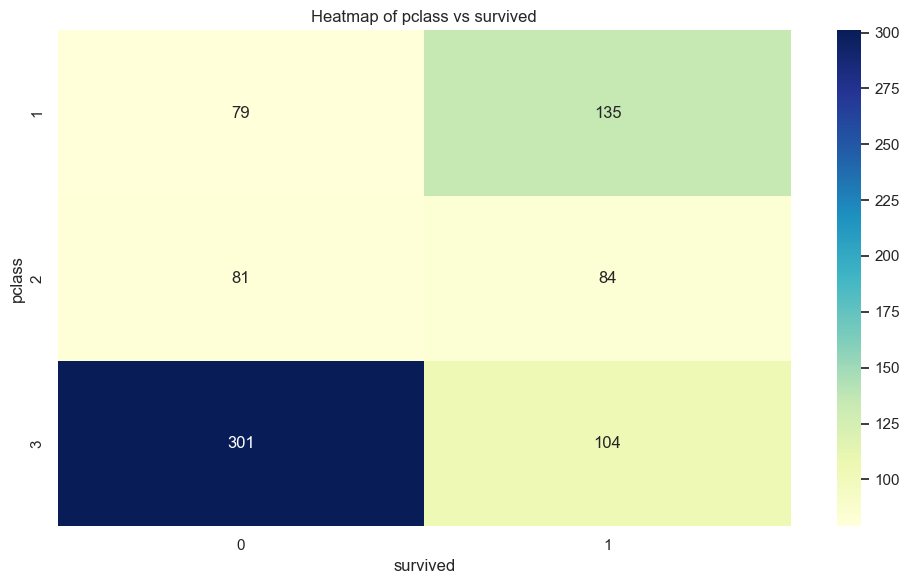

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, **kwargs)


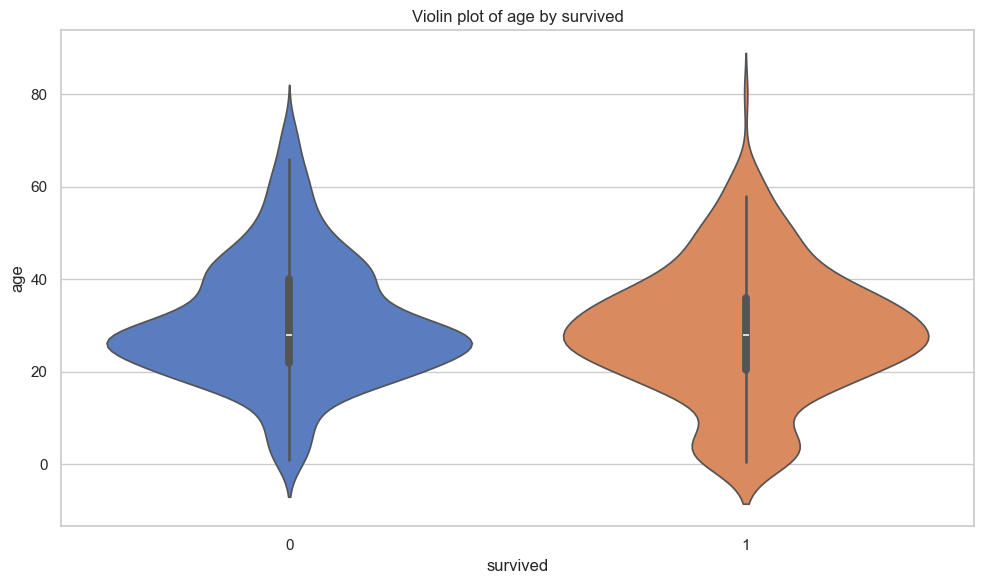

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, palette=color, **kwargs)


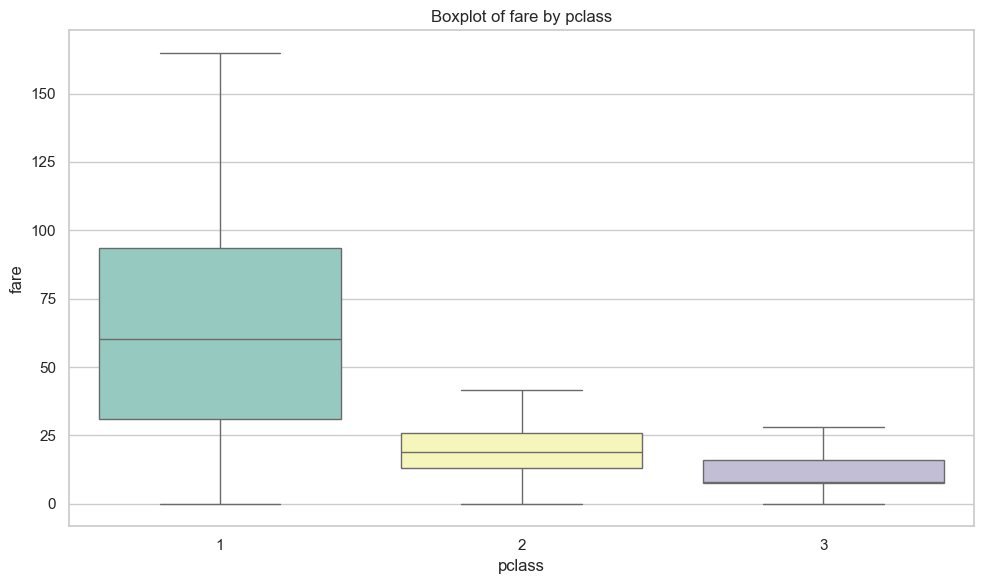

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day_05_Titanic_EDA\EDA_utils.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values.index, y=mean_values.values, **kwargs)


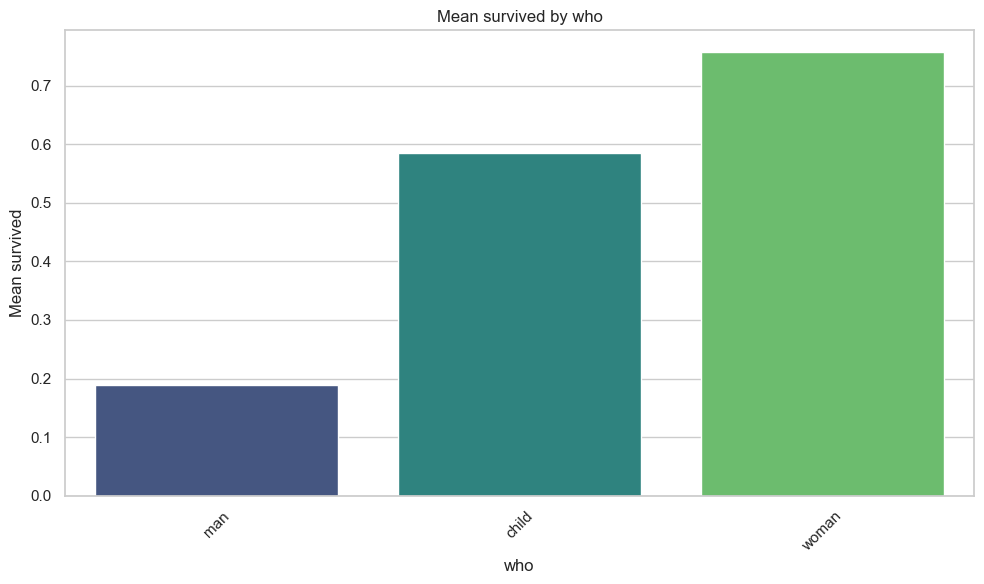

In [ ]:
#1. Survival by Class and Gender
plot_heatmap_category_combinations(
    data, 
    'pclass', 
    'survived', 
    filename='survival_by_class.png'
)

# 2. Age Distribution by Survival
plot_violin(
    data, 
    x='survived', 
    y='age', 
    filename='age_violin_survival.png',
    palette='muted'
)

# 3. Rates per Class
plot_boxplot(
    data, 
    x='pclass', 
    y='fare', 
    filename='fare_by_class.png',
    # Hide outliers for better viewing
    showfliers=False  
)

# 4. Survival by "who" (men/women/children)
plot_bar_mean_by_category(
    data, 
    category='who', 
    value='survived', 
    filename='survival_rate_by_type.png',
    palette='viridis'
)

1. Create interaction between sex and pclass, and a binary variable is_child (age < 12) to capture non-linear patterns.
2. Consider winsorizing 3rd class fare (values >$50 could be errors).
3. embark_town and embarked contain redundant information. Keep only one.
4. Use stratified k-fold to maintain survival proportions in each split, given the imbalance.